In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и первичный обзор

In [17]:
df = pd.read_csv('shopping_behavior.csv')

print(df.head())
df.info()

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

# Обработка данных

In [18]:
missing_values = df.isnull().sum()
print("Пропуски по столбцам:\n", missing_values)

duplicates_count = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

Пропуски по столбцам:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
Количество полных дубликатов: 0


In [19]:
from scipy import stats

z_scores = np.abs(stats.zscore(df['Purchase Amount (USD)']))
outliers = np.where(z_scores > 3)
print(f"Количество выбросов по Z-score: {len(outliers[0])}")

Количество выбросов по Z-score: 0


In [20]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [21]:
print(df['Category'].value_counts())

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


# Визуализация

Text(0.5, 1.0, 'Распределение возраста покупателей')

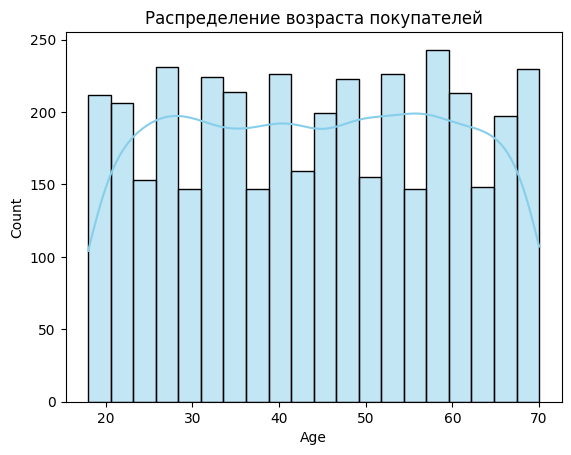

In [22]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста покупателей')

/tmp/ipython-input-2761723876.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


Text(0.5, 1.0, 'Количество покупок по категориям')

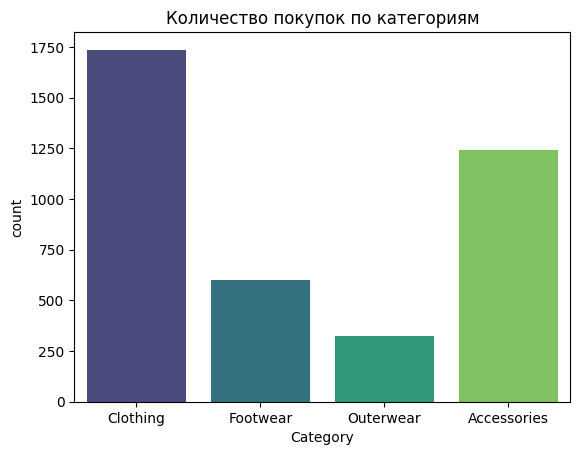

In [23]:
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Количество покупок по категориям')

Text(0.5, 1.0, 'Разброс цен по сезонам')

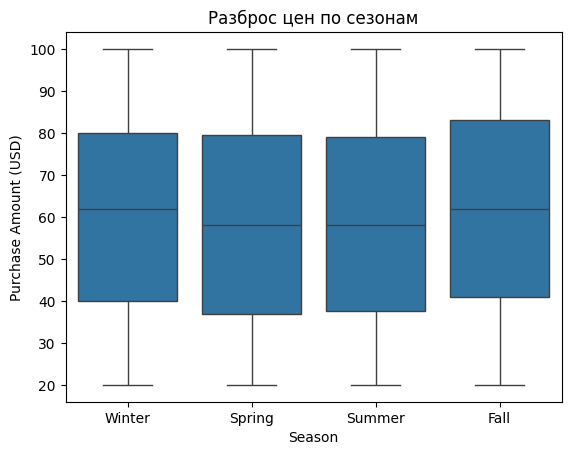

In [24]:
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)')
plt.title('Разброс цен по сезонам')

Text(0.5, 1.0, 'Корреляция признаков')

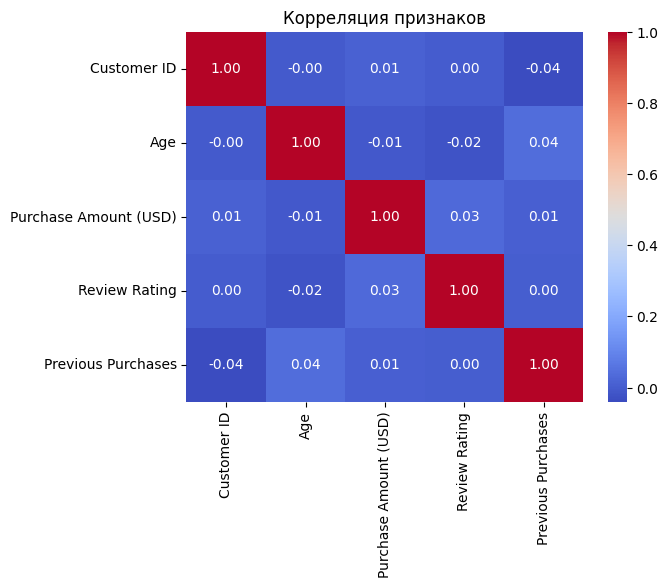

In [25]:
num_df = df.select_dtypes(include=[np.number])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция признаков')

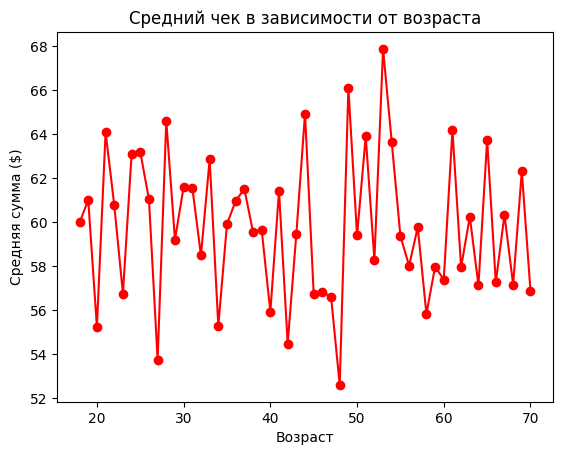

In [26]:
age_purchase = df.groupby('Age')['Purchase Amount (USD)'].mean()
plt.plot(age_purchase.index, age_purchase.values, marker='o', linestyle='-', color='red')
plt.title('Средний чек в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Средняя сумма ($)')
plt.show()

# Группировки и агрегации

In [27]:
gender_stats = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count'])
print("Статистика по полу:\n", gender_stats)

top_loc = df['Location'].value_counts().nlargest(5).index
payment_pivot = df[df['Location'].isin(top_loc)].pivot_table(
    index='Location',
    columns='Payment Method',
    values='Purchase Amount (USD)',
    aggfunc='count'
)
print("\nСводная таблица методов оплаты (Топ-5 штатов):\n", payment_pivot)

subscription_impact = df.groupby('Subscription Status')['Review Rating'].mean()
print("\nВлияние подписки на средний рейтинг:\n", subscription_impact)


Статистика по полу:
              mean     sum  count
Gender                          
Female  60.249199   75191   1248
Male    59.536199  157890   2652

Сводная таблица методов оплаты (Топ-5 штатов):
 Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Location                                                                   
Alabama                    10     8           17          20      19     15
California                  7    16           19          17      20     16
Idaho                      13    14           17          14      21     14
Illinois                   11    20           12          10      11     28
Montana                    21    21            9          18      14     13

Влияние подписки на средний рейтинг:
 Subscription Status
No     3.752722
Yes    3.742450
Name: Review Rating, dtype: float64
